# Python Implementation of Naive Bayes using scikit learn :Walk-through with the Iris Data Set

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

%matplotlib inline
sns.set()

## Step 1: $Load$ $the$ $dataset$



In [2]:
# load the iris dataset  
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Step 2: $Visualization$
#### Plot a simple scatter plot of 2 features of the iris dataset on the basis of: 

### A) Sepal length vs Sepal width

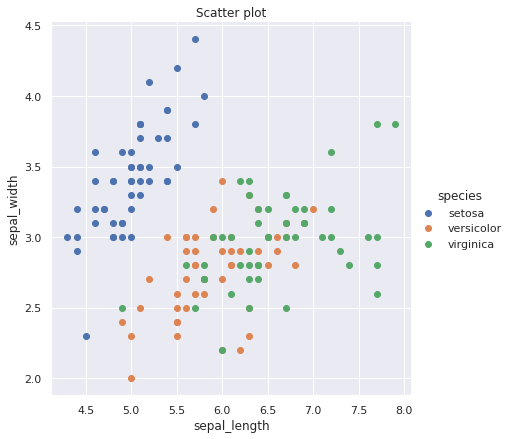

In [3]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=6) .map(plt.scatter,"sepal_length", "sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["sepal_length", "sepal_width",'species']]


Relationship between sepal width and length between the three classes of flowers. Virginica and versica look to be relatively similar in sepal size, but setosa has created its own cluster to the left.

### B)Petal length vs Petal width

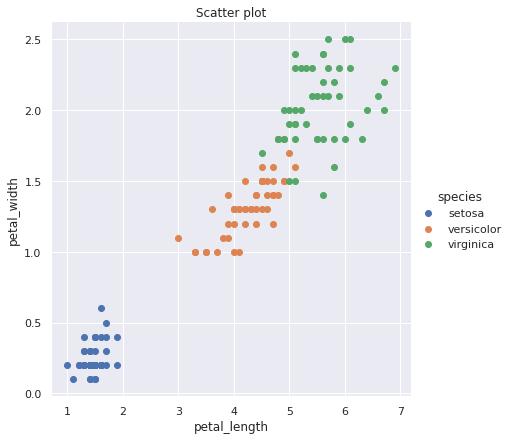

In [ ]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=6) .map(plt.scatter,"petal_length", "petal_width", )  .add_legend()
plt.title('Scatter plot')
df2 = iris[["petal_length", "petal_width",'species']]

Visualizing the relationship between petal length and width. We can see that the flowers are starting to cluster individually, and elements related to petal size may be a strong determinate of class.

## Step 3: $Store$ $the$ $input$ $data$

Here, as you can see we stored the true labels(species) into target variable y and the rest of the feature matrix, which consists of features such as sepal_length,sepal_width,petal_length,petal_width into variable X. For storing the feature vector into varibale X,we simply use the code  .drop() function to remove the column "species" from the dataframe. Here axis=1 denotes that we are performing removal of the column. 

In [4]:
# store the feature matrix (X) and true labels(y) 
y=iris['species']
X=iris.drop('species',axis=1)

## Step 4: $Splitting$ $of$ $the$ $dataset$

The X and y are then divided into training set (X_train) and test set(X_test) . For the division of the dataset, we use the train_test_split function imported from sklearn.model_selection. The parameter of the train_test_split function, test_size denotes the percentage of the original dataset which we are using as the test set. Here test_size is set equal to 0.2, that means 20% of the original dataset is used as test set and the rest 80% is used as the training set.

The random_state  ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

In [15]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 5: $Training$ $the$ $Naive$ $Bayes$ $model$

Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss

First import the Gaussian Naive Bayes(GaussianNB) using scikit learn library. Then train the model on the training set( X_train).

In [16]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

## Step 6: $Model$ $Prediction$

“Prediction” refers to the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting the likelihood of a particular outcome.

Here, we perform .predict() function on the test data(X_test) after training the Naive bayes model on the training data.The predicted output(class in which the iris belongs) is stored in variable  y_pred. 

In [17]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']


## Step 7: $Comparison$ $of$ $the$ $predicted$ $labels$ $with$ $the$ $true$ $labels$
#### Comparing the first 30 predicted class labels with the true labels

In [18]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the first 30 values
y_compare[:30,:]

array([['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['virginica', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['versicolor', 'versicolor'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['virginica', 'virginica'],
       ['versicolor', 'versicolor'],
       ['setosa', 'setosa']], dtype=object)

## Step 8: $Accuracy$ $of$ $the$ $ML$ $Model$

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples, or the percentage of the number of correctly predicted data points out of all the data points. 



In [19]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.65217391304348


# Visualization of the Classification results (Optional)

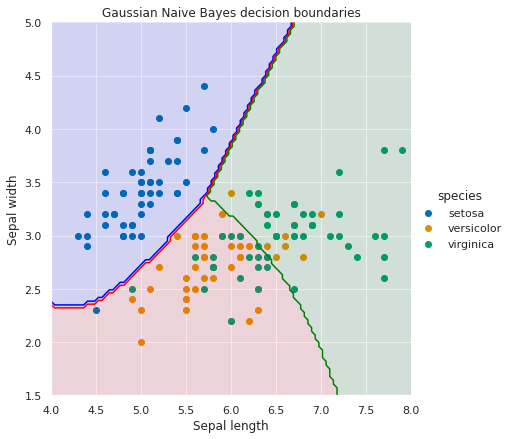

In [ ]:
#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
gnb1 = GaussianNB(priors = None)
gnb1.fit(X_data,y_labels)

N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=6, palette = 'colorblind') .map(plt.scatter, "sepal_length", "sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [gnb1.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','red','green'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','red','green'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()